In [1]:
# Step 1: Importing necessary libraries
import numpy as np              # For numerical operations
import pandas as pd             # For data manipulation and analysis
import matplotlib.pyplot as plt # For plotting graphs
import seaborn as sns           # For better visualization
from sklearn.cluster import KMeans  # For K-Means algorithm


In [2]:
data = pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.info()         # Gives column names, non-null count, and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
data.describe()     # Gives statistical summary (mean, std, min, max, etc.)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
# Step 4: Check missing values
data.isnull().sum()


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
# Step 5: Selecting relevant features for clustering
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Display first few rows
X.head()




,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


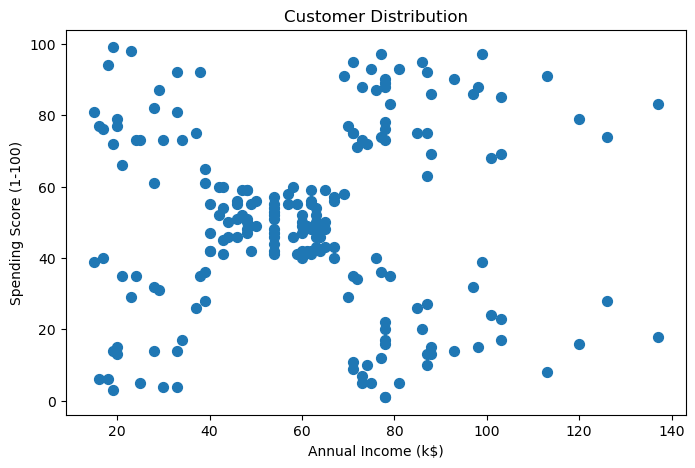

In [7]:
# Step 6: Scatter plot to visualize data
plt.figure(figsize=(8,5))
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], s=50)
plt.title('Customer Distribution')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


C:\Users\BHUMI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\BHUMI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\BHUMI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\BHUMI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

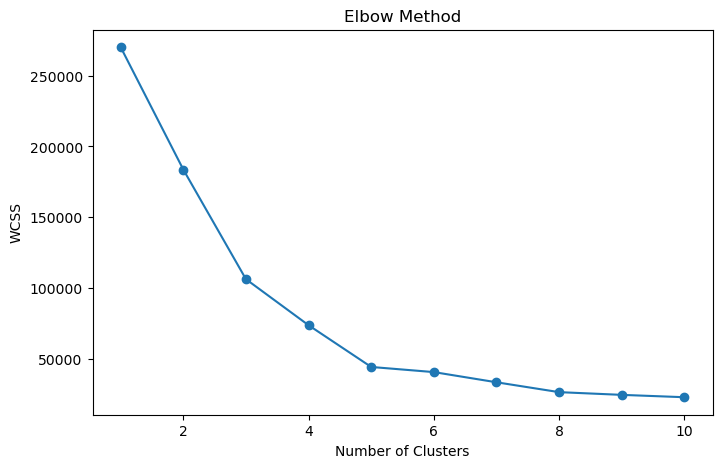

In [8]:
# Step 7: Using Elbow Method to find optimal number of clusters
wcss = []  # Within Cluster Sum of Squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot Elbow Graph
plt.figure(figsize=(8,5))
plt.plot(range(1,11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [9]:
# Step 8: Apply KMeans with 5 clusters (as observed from Elbow Method)
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Add cluster label to dataset
data['Cluster'] = y_kmeans



C:\Users\BHUMI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


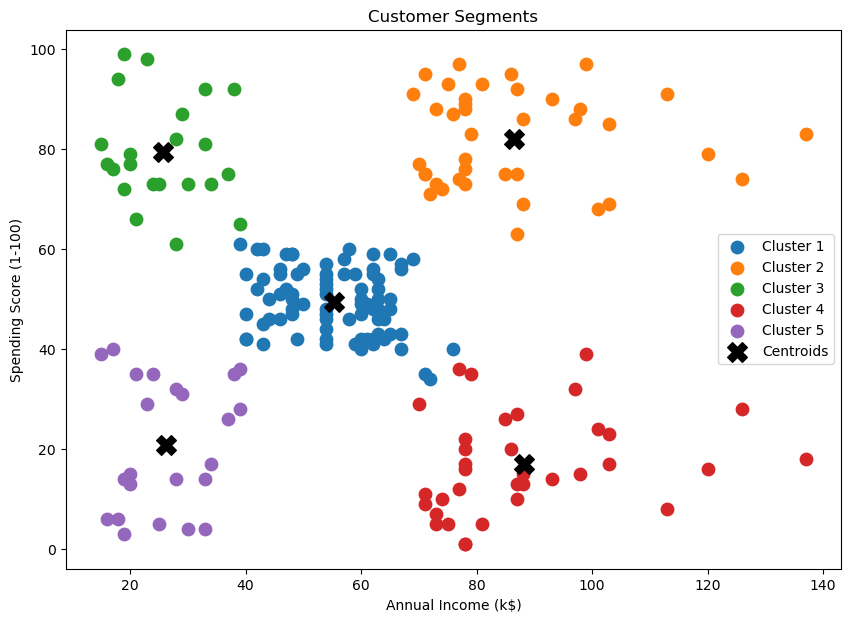

In [10]:
# Step 9: Visualizing clusters
plt.figure(figsize=(10,7))

# Plot each cluster
plt.scatter(X[y_kmeans == 0]['Annual Income (k$)'], X[y_kmeans == 0]['Spending Score (1-100)'], s=80, label='Cluster 1')
plt.scatter(X[y_kmeans == 1]['Annual Income (k$)'], X[y_kmeans == 1]['Spending Score (1-100)'], s=80, label='Cluster 2')
plt.scatter(X[y_kmeans == 2]['Annual Income (k$)'], X[y_kmeans == 2]['Spending Score (1-100)'], s=80, label='Cluster 3')
plt.scatter(X[y_kmeans == 3]['Annual Income (k$)'], X[y_kmeans == 3]['Spending Score (1-100)'], s=80, label='Cluster 4')
plt.scatter(X[y_kmeans == 4]['Annual Income (k$)'], X[y_kmeans == 4]['Spending Score (1-100)'], s=80, label='Cluster 5')

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', marker='X', label='Centroids')

plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


In [11]:
# Step 11: Inference
print("Inference:")
print("Cluster 1 → Low income, Low spending")
print("Cluster 2 → Average income, Average spending")
print("Cluster 3 → High income, Low spending")
print("Cluster 4 → High income, High spending (Target customers!)")
print("Cluster 5 → Low income, High spending")



Inference:
Cluster 1 → Low income, Low spending
Cluster 2 → Average income, Average spending
Cluster 3 → High income, Low spending
Cluster 4 → High income, High spending (Target customers!)
Cluster 5 → Low income, High spending
